In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [40]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
import os
from PIL import Image
from IPython.display import display

In [43]:
import warnings
warnings.filterwarnings('ignore')

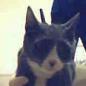

In [44]:
with Image.open('../Data/CATS_DOGS/test/CAT/10107.jpg') as im:
    display(im)

In [45]:
path = '../Data/CATS_DOGS'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+"/"+img)


In [46]:
img_names

['../Data/CATS_DOGS\\test\\CAT/10000.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10001.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10002.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10003.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10004.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10005.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10006.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10007.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10008.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10009.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10010.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10011.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10012.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10013.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10014.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10015.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10016.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10017.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10018.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10019.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10020.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10021.jpg',
 '../Data/CATS_DOGS\\test\\CAT/10022.jpg',
 '../Data/C

In [47]:
len(img_names)

24994

In [48]:
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)

In [49]:
len(img_sizes)

24994

In [50]:
len(rejected)

0

In [51]:
df = pd.DataFrame(img_sizes)

In [52]:
df.describe()

,0,1
count,24994.000000,24994.000000
mean,404.493518,361.037129
std,108.941802,96.936811
min,42.000000,33.000000
25%,323.000000,302.000000
50%,448.000000,375.000000
75%,500.000000,421.000000
max,500.000000,500.000000


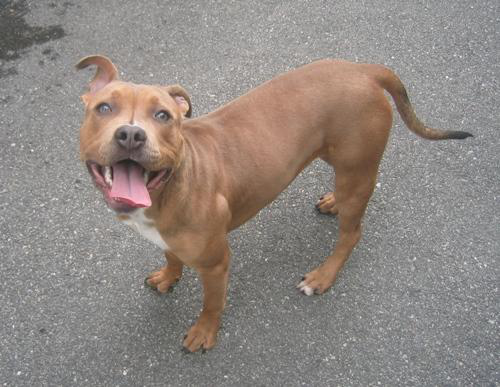

In [53]:
dog = Image.open('../DATA/CATS_DOGS/train/DOG/14.jpg')
display(dog)

In [54]:
dog.size

(500, 387)

Pixels values are usually from 0 ~ 255

In [55]:
dog.getpixel((0,0)) # x = 0, y = 0

(90, 95, 98)

In [56]:
transform = transforms.Compose([
    transforms.ToTensor()
])

im = transform(dog)
print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


**plt.imshow(im)** this gives us an error, because the shape is (3,387,500), when it expects (387, 500, 3). (Width, Height, Channel).<br>
So in this case we will transpose by the shape (1,2,0)

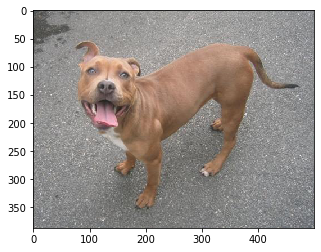

In [57]:
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [58]:
im[:,0,0]

tensor([0.3529, 0.3725, 0.3843])

In [59]:
np.array(dog.getpixel((0,0)))/255

array([0.35294118, 0.37254902, 0.38431373])

__transforms.ReSize()__ <br>
- If the size is an integer, then the smaller edge(width/height) of the image will be matched to this image.
- If the size is tuple (height, width), we can conver the height and width

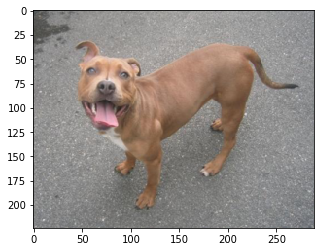

In [60]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])
im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))
# In this case, the height turned to 224

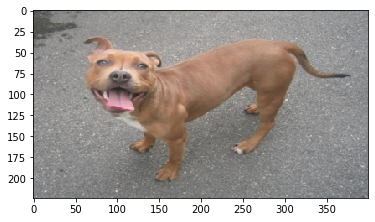

In [66]:
transform = transforms.Compose([
    transforms.Resize((224,400)),
    transforms.ToTensor()
])
im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))
# In this case, the height turned to 224

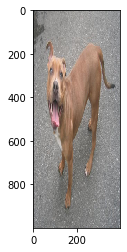

In [65]:
transform = transforms.Compose([
    transforms.Resize((1000,400)),
    transforms.ToTensor()
])
im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

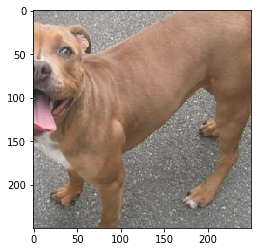

In [68]:
transform = transforms.Compose([
    transforms.CenterCrop(250),
    transforms.ToTensor()
])
im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))
# Gets 250 x 250 size and centers in the image

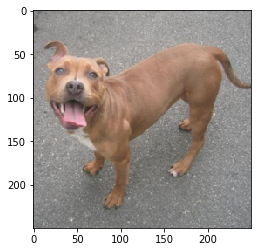

In [69]:
transform = transforms.Compose([
    transforms.Resize(250),
    transforms.CenterCrop(250),
    transforms.ToTensor()
])
im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))
# Gets 250 x 250 size and centers in the image

Random Horizontal Flip

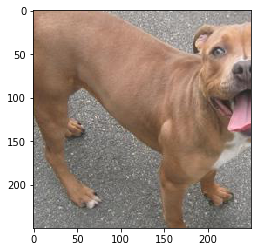

In [70]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1), # 100% it will be flipped. (Horizontal)
    transforms.CenterCrop(250),
    transforms.ToTensor()
])
im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))
# Gets 250 x 250 size and centers in the image

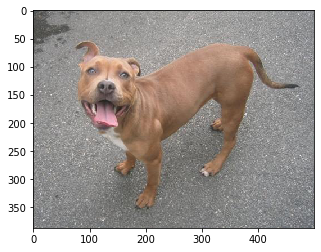

In [74]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=.2), # 100% it will be flipped. (Horizontal)
    transforms.ToTensor()
])
im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))
# Gets 250 x 250 size and centers in the image

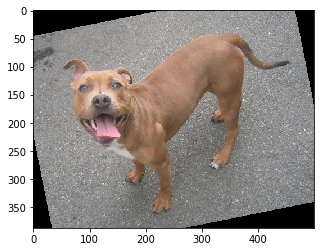

In [80]:
transform = transforms.Compose([
    transforms.RandomRotation(30), # +/- rotate
    transforms.ToTensor()
])
im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))
# Gets 250 x 250 size and centers in the image

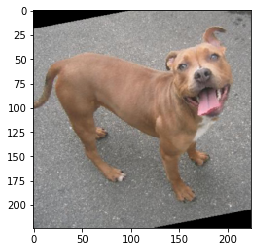

In [81]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomRotation(30),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))
# Gets 250 x 250 size and centers in the image

If we want to use your images on a someone's pretrained network, we would like to normalize them in the way that the pretrained model expects.<br>
In this case, we use mean=[0.485,0.4856,0.406], std=[0.229,0.224,0.225].<br>Reason we use these values are because a lot of pretrained networks end up using this particular values.<br>
The arrays here are the list of values for each channels

In [82]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.4856,0.406], std=[0.229,0.224,0.225]),
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


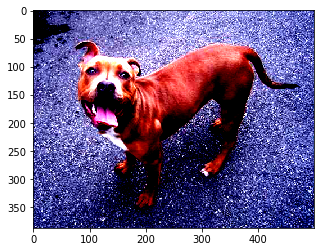

In [83]:
im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

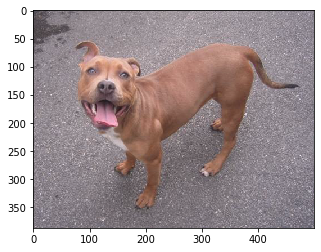

In [89]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(),(1,2,0)))